# Métodos de Ordenamiento

## Algoritmo de Ordenamiento por Mezclas (Merge sort)
Es un algoritmo que sigue el paradigma "Divide & Conquer" (Dividir y Conquistar, Dividir para conquistar, Divide y vencerás, etc...) creado por [John von Neumann](https://es.wikipedia.org/wiki/John_von_Neumann#Ciencia_computacional). Este algoritmo clásico de ordenamiento esta compuesto por dos etapas:

- Dividir un arreglo de tamaño $n$ en dos subarreglos de tamaño $\frac{n}{2}$, los cuales a su vez se dividen recursivamente, hasta que sean indivisibles (tienen solo 1 elemento).
- La segunda etapa de Mezcla, asume que un arreglo de tamaño 1 ya esta ordenado, por lo que comienza a mezclar los arreglos de forma ordenada, primero los de tamaño 1, generando arreglos de tamaño 2, luego estos se mezclan generando arreglos de tamaño 4 y así sucesivamente hasta que se obtiene nuevamente un arreglo de tamaño $n$ ordenado.

En la siguiente imagen podemos ver como funciona este algoritmo en sus diferentes etapas de <font color="red">Dividir</font> y <font color="green">Mezclar</font>.

<img src="resources/mergesort.svg"></img>

In [1]:
# Esta primera funcion realiza la división recursiva del arreglo
def mergesort(arr):
    print("Divide ",arr)
    if len(arr)>1:
        mid = len(arr)//2
        lefthalf = arr[:mid]
        righthalf = arr[mid:]

        mergesort(lefthalf)
        mergesort(righthalf)
        merge(arr,lefthalf,righthalf)
        print("Merge ", arr)

# Esta funcion realiza la mezcla ordenada de los subarreglos      
def merge(arr,lefthalf,righthalf):
    i=0
    j=0
    k=0
    while i < len(lefthalf) and j < len(righthalf):
        if lefthalf[i] < righthalf[j]:
            arr[k]=lefthalf[i]
            i=i+1
        else:
            arr[k]=righthalf[j]
            j=j+1
        k=k+1

    while i < len(lefthalf):
        arr[k]=lefthalf[i]
        i=i+1
        k=k+1

    while j < len(righthalf):
        arr[k]=righthalf[j]
        j=j+1
        k=k+1           

Mergesort es un algoritmo muy eficiente en términos de tiempo, siendo capaz de manejar arreglos de hasta millones de elementos. Como contrapartida, podemos ver que este algoritmo necesita grandes cantidades de memoria extra (linea 6 y 7), ya que en cada llamada recursiva duplica el espacio necesario para resolver el ordenamiento.
Actualmente existen variantes que usan menos espacio, llegando incluso a implementaciones "in-place" (algoritmos que no usan memoria extra), sin embargo, el algoritmo a analizar corresponde a la implementación clásica.

In [2]:
arreglo=[15,5,8,9,3,2,7,18,12]
mergesort(arreglo)
print ("Resultado final")
print (arreglo)

Divide  [15, 5, 8, 9, 3, 2, 7, 18, 12]
Divide  [15, 5, 8, 9]
Divide  [15, 5]
Divide  [15]
Divide  [5]
Merge  [5, 15]
Divide  [8, 9]
Divide  [8]
Divide  [9]
Merge  [8, 9]
Merge  [5, 8, 9, 15]
Divide  [3, 2, 7, 18, 12]
Divide  [3, 2]
Divide  [3]
Divide  [2]
Merge  [2, 3]
Divide  [7, 18, 12]
Divide  [7]
Divide  [18, 12]
Divide  [18]
Divide  [12]
Merge  [12, 18]
Merge  [7, 12, 18]
Merge  [2, 3, 7, 12, 18]
Merge  [2, 3, 5, 7, 8, 9, 12, 15, 18]
Resultado final
[2, 3, 5, 7, 8, 9, 12, 15, 18]


### Caso Promedio
Para el caso promedio, debemos analizar el costo de ambas llamadas recursivas y a eso sumarle el costo de la llamada al merge. En general tenemos que:

$$T_d(n)=T_d(\frac{n}{2})+T_d(\frac{n}{2})+T_m(n)$$

La función merge realiza un recorrido secuencial por ambos arreglos, de esta manera ordena el arreglo mayor. Esto nos indica que su costo es lineal al número de elementos ($T_m(n)=n$), quedando nuestra ecuación de costo:

$$T_d(n)=T_d(\frac{n}{2})+T_d(\frac{n}{2})+n$$
$$T_d(n)=2T_d(\frac{n}{2})+n$$

Dividiendo por $n$:

$$\frac{T_d(n)}{n}=\frac{2T_d(\frac{n}{2})}{n}+1$$

Para resolver esta ecuación trabajaremos sobre el supuesto que $n$ es múltiplo de 2 ($n=2^x$).

$$\frac{T_d(2^x)}{2^x}=\frac{2T_d(\frac{2^x}{2})}{2^x}+1$$
$$\frac{T_d(2^x)}{2^x}=\frac{T_d(2^{x-1})}{2^{x-1}}+1$$

Por lo tanto:
$$\frac{T_d(2^{x-1})}{2^{x-1}}=\frac{T_d(2^{x-2})}{2^{x-2}}+1$$

Reemplazando en la función anterior:
$$\frac{T_d(2^x)}{2^x}=\frac{T_d(2^{x-2})}{2^{x-2}}+1+1$$

Repitiendo el proceso $n-1$ veces:
$$\frac{T_d(2^x)}{2^x}=\frac{T_d(2^0)}{2^0}+x$$
$$\frac{T_d(2^x)}{2^x}=T_d(1)+x$$
$$T_d(1)=0$$
$$T_d(2^x)=x2^x$$

¿Cuanto es $x$ respecto a $n$?
$$n=2^x$$
$$\lg n = x\lg 2$$
$$x=\lg n$$

Por lo tanto:
$$T_d(n)=n\lg n$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import time as tm
import scipy as sp

def mergesort(arr):
    if len(arr)>1:
        mid = len(arr)//2
        lefthalf = arr[:mid]
        righthalf = arr[mid:]

        mergesort(lefthalf)
        mergesort(righthalf)
        merge(arr,lefthalf,righthalf)

def merge(arr,lefthalf,righthalf):
    i=0
    j=0
    k=0
    while i < len(lefthalf) and j < len(righthalf):
        if lefthalf[i] < righthalf[j]:
            arr[k]=lefthalf[i]
            i=i+1
        else:
            arr[k]=righthalf[j]
            j=j+1
        k=k+1

    while i < len(lefthalf):
        arr[k]=lefthalf[i]
        i=i+1
        k=k+1

    while j < len(righthalf):
        arr[k]=righthalf[j]
        j=j+1
        k=k+1  

Definimos el arreglo donde se guardarán los números a ordenar, un arreglo con los tamaños de los arreglos a ordenar y un arreglo para guardar los tiempos de ejecución.


In [2]:
arreglo=[]
sizes=[64,128,256,512,1024,2048,4096,8192]
tiempos=[]

En el siguiente ciclo se generarán los arreglos con números aleatorios (lineas 2 y 3), se ordenarán con mergesort tomando sus tiempos (lineas 5 al 8) y luego se descartarán para pasar al siguiente tamaño en el arreglo sizes (lineas 10 y 11).

In [4]:
for curr_size in sizes:
    for i in range(0,curr_size):
        arreglo.append(rnd.randint(1,200000))
    
    tiempo_inicial=tm.time()
    mergesort(arreglo)
    tiempo_final=tm.time()
    tiempos.append(tiempo_final-tiempo_inicial)
    
    del arreglo
    arreglo=[]
    
print (sizes)
print (tiempos)

[64, 128, 256, 512, 1024, 2048, 4096, 8192]
[0.000659942626953125, 0.0010716915130615234, 0.002357959747314453, 0.009159088134765625, 0.008432865142822266, 0.02001190185546875, 0.03200101852416992, 0.06835198402404785]


Finalmente gráficamos los tiempos a través de la librería matplotlib. Los puntos corresponden a las coordenadas sizes x tiempos y la linea es la aproximación. Podemos ver que obtenemos el comportamiento esperado para el ordenamiento por mezclas, con una gráfica levemente superior a lineal.


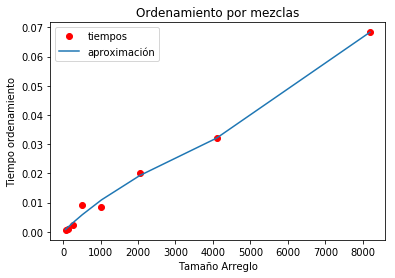

In [11]:
aproximacion=sp.polyfit(sizes,tiempos,3)

plt.plot(sizes, tiempos, "or", label='tiempos')
plt.plot(sizes, sp.polyval(aproximacion,sizes), label='aproximación')
plt.xlabel('Tamaño Arreglo')
plt.ylabel('Tiempo ordenamiento')

plt.title('Ordenamiento por mezclas')

plt.legend(loc='best')

plt.show()